# Preços de Combustíveis
por:Josias Virgolino C. Carneiro

#### motivação e objetivos
    A motivação para esta análise foi a curiosidade sobre o preço
    do gás de cozinha e combustível e o quanto estão subindo 

### Dados usados

    a ANP acompanha os preços praticados por revendedores de combustíveis automotivos e de gás liquefeito de 
    petróleo envasilhado em botijões de 13 quilos (GLP P13), por meio de uma pesquisa semanal de preços realizada
    por empresa contratada.
    
    Na exploração inicial dos dados foi-se percebido que os dados dos datasets de forma individual tem muitas
    informações sobre empresa (local ) com a informação que nos é relevante sendo o valor de venda.


### Pré-processamento

    O Pré-processamento dos datasets começa com a leitura e transformação dos dados dos com ler o csv com ”;” em vez “,”
    e a substituição “,” por “.” na coluna  valor de venda. depois foi se escolhido a variável de localização adequadas 
    a “curiosidade” e objetivo desta análise e adequamos o valor de vendas a ela.e juntamos e organizamos ao longo do tempo

##### processo pode ser visto no arquivo "progeto_part_final.ipynb" do repositorio.

### Perguntas:

In [43]:
import pandas as pd
import numpy  as np
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import linregress
import matplotlib.pyplot as plt

pd.options.display.max_rows = 300000

In [39]:
Gas_file = pd.read_csv("df-glp-mean.csv")
Combutivel_file = pd.read_csv("df-ca-mean.csv")
Gas_file.set_index('Estado - Sigla',inplace=True)
Combutivel_file.set_index('Estado - Sigla',inplace=True)
Gas_file

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Estado - Sigla,,,,,,,,,,,,,,,,,,,
AC,36.333798,37.132276,37.141167,38.189894,38.656467,39.614560,41.221386,43.325613,45.030892,47.259010,49.644151,54.055974,58.835800,65.904425,78.803657,79.924527,85.739239,107.166938,125.984162
AL,30.987407,29.967015,31.924023,30.703149,31.759598,33.911191,35.876218,37.015875,37.379074,38.696903,42.005158,46.300557,50.659470,56.086545,66.115017,65.014817,65.727542,87.073436,106.688649
AM,29.020960,29.886881,30.753794,31.887429,31.418476,28.590855,29.512986,31.453102,32.764963,42.030944,44.804138,48.480229,52.672451,60.540401,72.856417,74.742692,78.645356,97.092555,116.769895
AP,34.310410,35.057050,36.544112,36.333968,36.658695,38.869443,41.491368,42.419349,43.698245,47.656914,52.425517,60.535966,67.175486,67.124963,73.005744,77.662958,83.373826,106.853469,121.316201
BA,31.579607,30.382315,32.146841,32.630472,32.844081,34.264191,35.157533,35.722697,36.883870,37.846132,39.298193,43.554742,50.068067,53.717485,60.768320,62.523880,64.552940,85.438355,107.594298
CE,31.143974,30.468127,31.886917,33.284347,34.647206,36.859671,37.517319,37.380717,38.489985,41.259569,45.068115,53.058940,60.909570,63.666920,70.549173,73.624559,76.182399,95.034496,112.793732
DF,32.734666,32.946094,35.208307,37.676556,36.959300,39.277707,40.155604,37.312112,37.415656,41.338972,43.576988,48.985937,57.718925,61.887274,71.467910,73.375916,71.029030,86.773027,103.749244
ES,29.317718,29.359128,32.895924,33.736234,33.537680,34.539857,34.733677,35.738798,36.289010,37.640686,40.681138,47.204473,51.813050,56.105198,63.236440,64.961254,68.134005,87.507792,104.737656
GO,29.510360,29.803235,32.429073,33.613912,33.097462,37.179583,40.426577,40.384038,40.403369,41.222003,42.395880,46.769306,56.256201,60.095670,71.779752,71.027170,71.480999,95.038190,115.833147


##### 1- quando o gás começou a aumentar
    R: O aumento começou em 2013,  entre 2018 a 2020 houve uma certa
    manutenção dos preços,e logo após houve um grande aumento.

<AxesSubplot:>

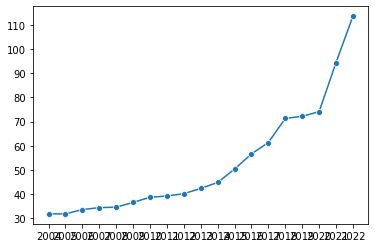

In [35]:
js= Gas_file.mean(axis=0)
js
sns.lineplot(data=js,marker="o")

##### 2- este mesmo aumento é visto na paraíba?
    R: Sim

<AxesSubplot:ylabel='PB'>

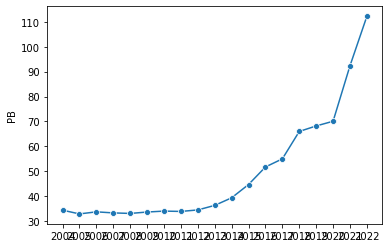

In [42]:
jr = Gas_file.transpose()
sns.lineplot(data=jr["PB"],marker="o")

NameError: name 'plt' is not defined

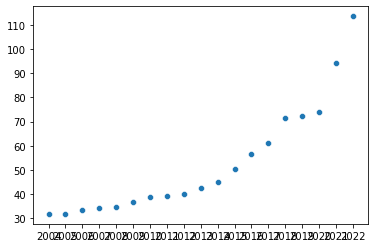

In [60]:
result = linregress(Gas_file.mean(),range(2004,2023))
def f(x):
    return x*result.slope + result.intercept
sns.scatterplot(data=Gas_file.mean())

plt.plot((2004,2022), (f(2004), f(2022)), c='red')
plt.show()